In [42]:
import pandas as pd

In [43]:
dataToPlot = ['cpuUsage', 'memoryUsage']
folders = ['3600s']

In [60]:
hardware = '8CPU_20RAM'

In [63]:
hardware = '12CPU_30RAM'

In [45]:
tests = ['2repl', '4repl', '6repl', '8repl', '10repl']

In [51]:
tests = ['trans_60s', 'trans_120s', 'trans_180s', 'trans_240s', 'trans_300s']

In [56]:
tests = ['req_20ms', 'req_100ms', 'req_500ms', 'req_1000ms', 'req_2000ms']

In [61]:
tests = ['A1_100-A2_100-A3_100', 'A1_200-A3_100', 'A2_200', 'A2_200-A3_100', 'A3_200']

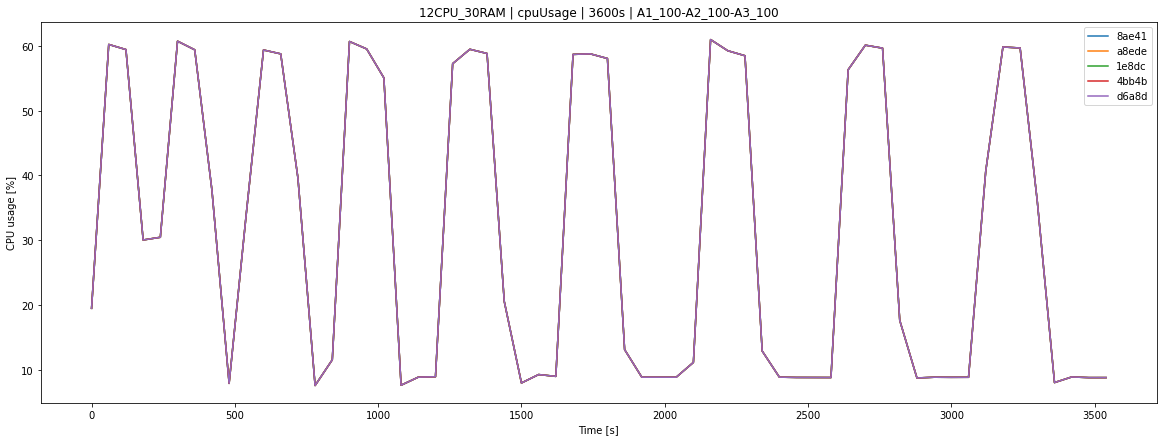

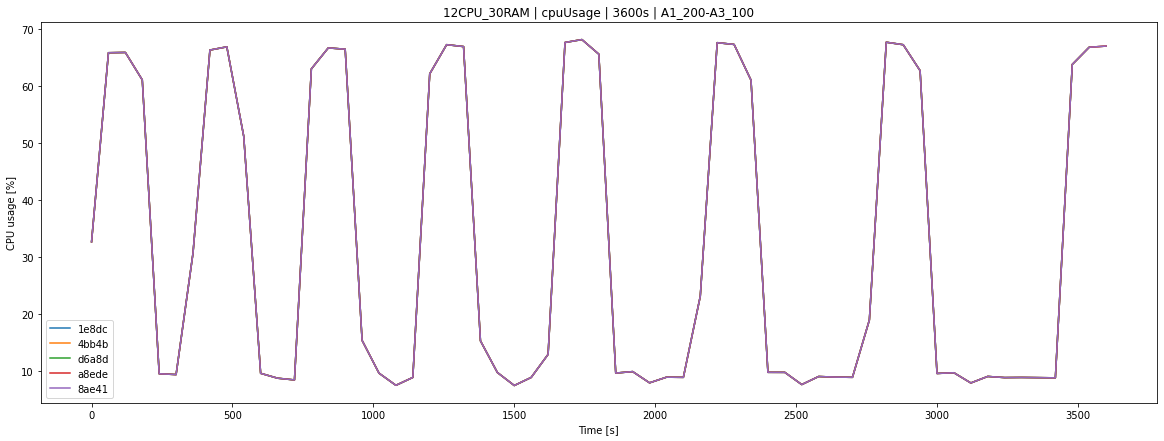

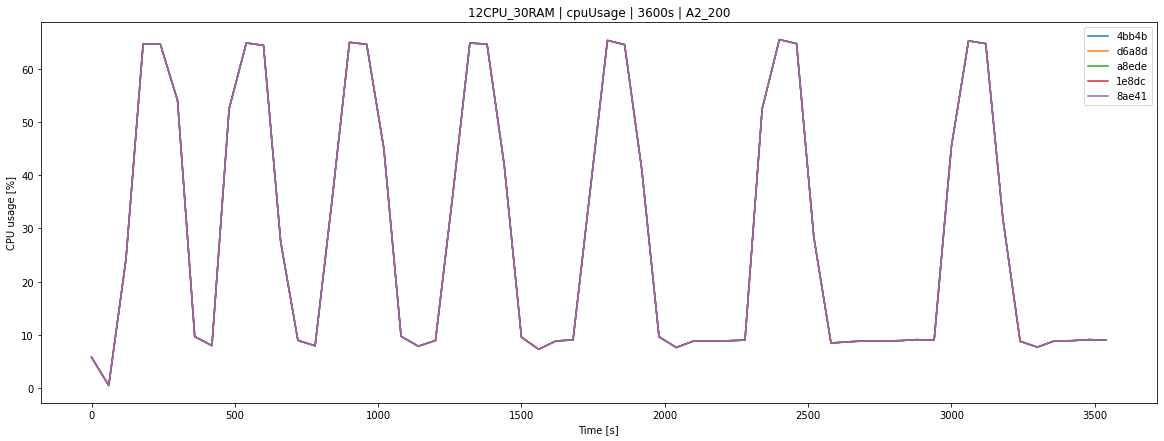

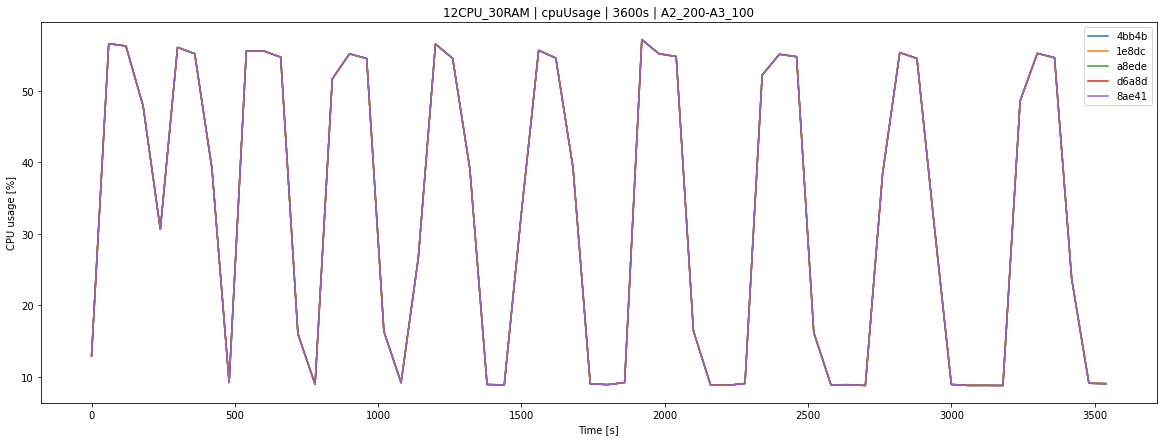

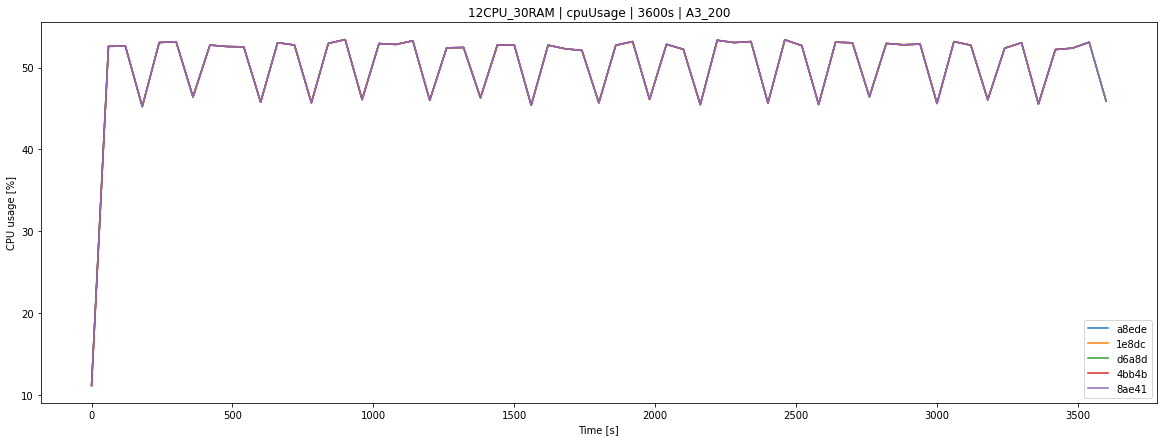

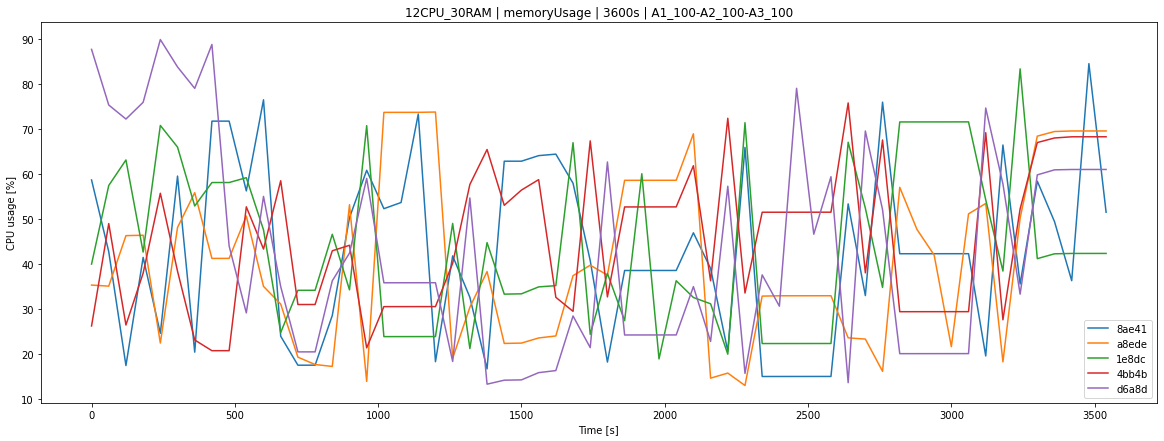

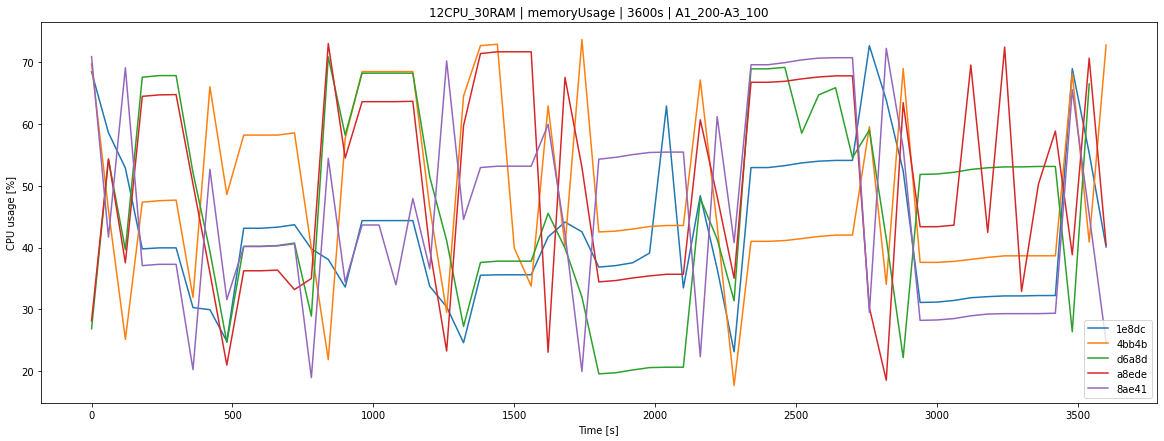

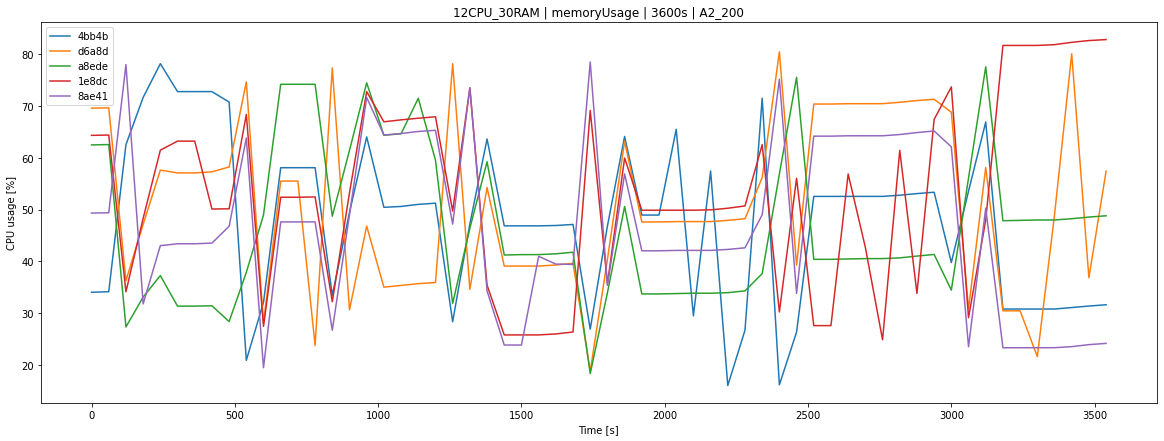

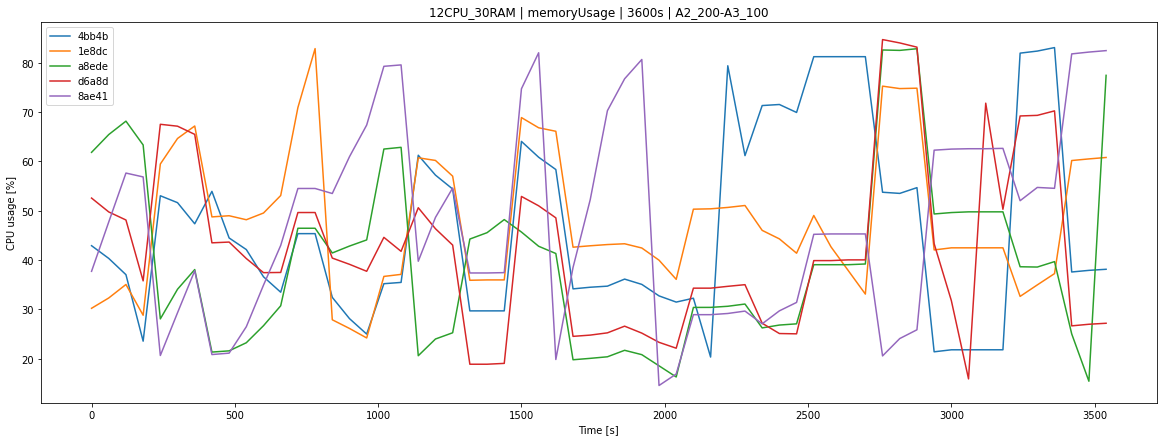

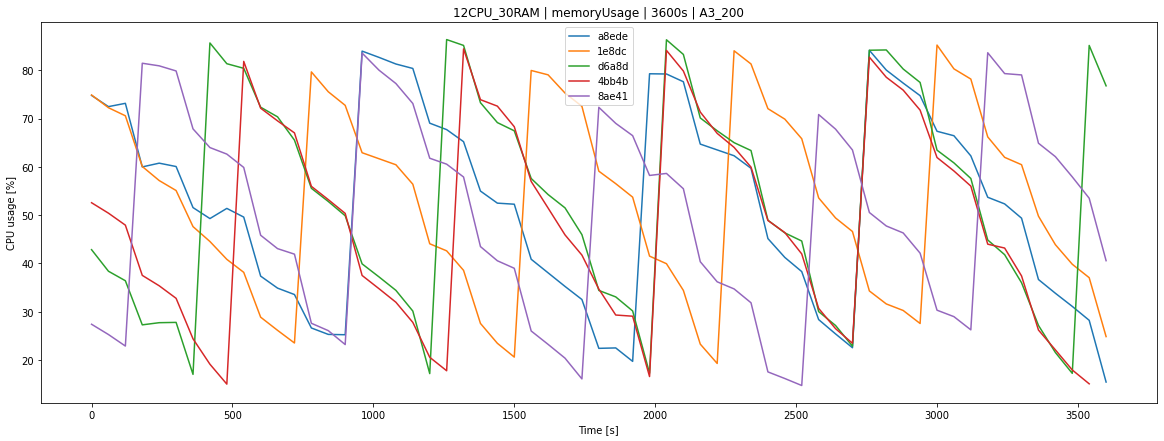

In [64]:
for f in folders:
    for j in dataToPlot:
        for i in tests:
            try:
                replicas = pd.read_csv(hardware + '/' + f + '/' + i + '/stock.csv', usecols=['replicaId']).replicaId.unique().tolist()
            except:
                continue
            data = pd.DataFrame()
            for r in replicas:
                try:
                    d = pd.read_csv(hardware + '/' + f + '/' + i + '/stock.csv', usecols=['timestamp', j, 'replicaId'])
                except:
                    continue
                q = r[0:5:1]
                
                d = d.sort_values(by=['timestamp'])
                t = d['timestamp'][0]
                d['Time [s]'] = d['timestamp'].apply(lambda x: (x - t)/60000 * 60)
                d[j] = d[j].apply(lambda x: x*100)
                d = d[(d['replicaId'] == r)]
                
                customDataFrame = pd.DataFrame({'Time [s]': d['Time [s]'], q: d[j]})
                customDataFrame = customDataFrame.loc[customDataFrame['Time [s]'] < 3600]

                data = pd.concat([data, customDataFrame])
            ax = data.set_index('Time [s]').plot(figsize=(20, 7), title = hardware + ' | ' + j + ' | ' + f + ' | ' + i)
            ax.set_xlabel("Time [s]")
            ax.set_ylabel("CPU usage [%]")